# Project 1: The Movie Database 10K Exploratory Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#questions">Questions</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this project, I will be analysing The Movie Database (TMDb) dataset which contains 10000 movies, including features such as user ratings, budget, revenue, genre and run-time etc. In particular, I will be investigating trends associated with movie's success for different variables to try understand what contributes to a movies success.

'Success' in this context could be a movie with either a high popularity, a large revenue generated and/or a high vote average.

> NB: This dataset contains two additional columns called `budget_adj` and `revenue_adj` which shows the budget and revenue of the associated movie in terms of 2010 US dollars, adjusted for inflation over time.

<a id='questions'></a>
## Research Questions

The questions I will be exploring are as follows:

1. Are movies with greater budgets associated with more successful?
2. How does runtime (the length of a movie) affect its success?
3. Do recent movies have greater success than older movies?

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Magic commands
%matplotlib inline

# Pandas Display Options
pd.set_option('display.max_columns', None) # Show all columns

In [2]:
# Resuable Function
def make_plot(x_data, y_data, title='Title', ylabel='Y', xlabel='X'):
    ''' A function to create scatter plots'''
    plt.scatter(x=x_data, y=y_data)
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.show()

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [3]:
# Load the dataset
tmdb_df = pd.read_csv('tmdb-movies.csv')
tmdb_df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [4]:
# Get dimensions of dataset
print('Shape:', tmdb_df.shape)

Shape: (10866, 21)


In [5]:
# Get basic info on data types & possible missing values
tmdb_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [6]:
# Some basic statistics
tmdb_df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [7]:
# Check for duplicates
print('Number of duplicated rows:', tmdb_df.duplicated().sum())

Number of duplicated rows: 1


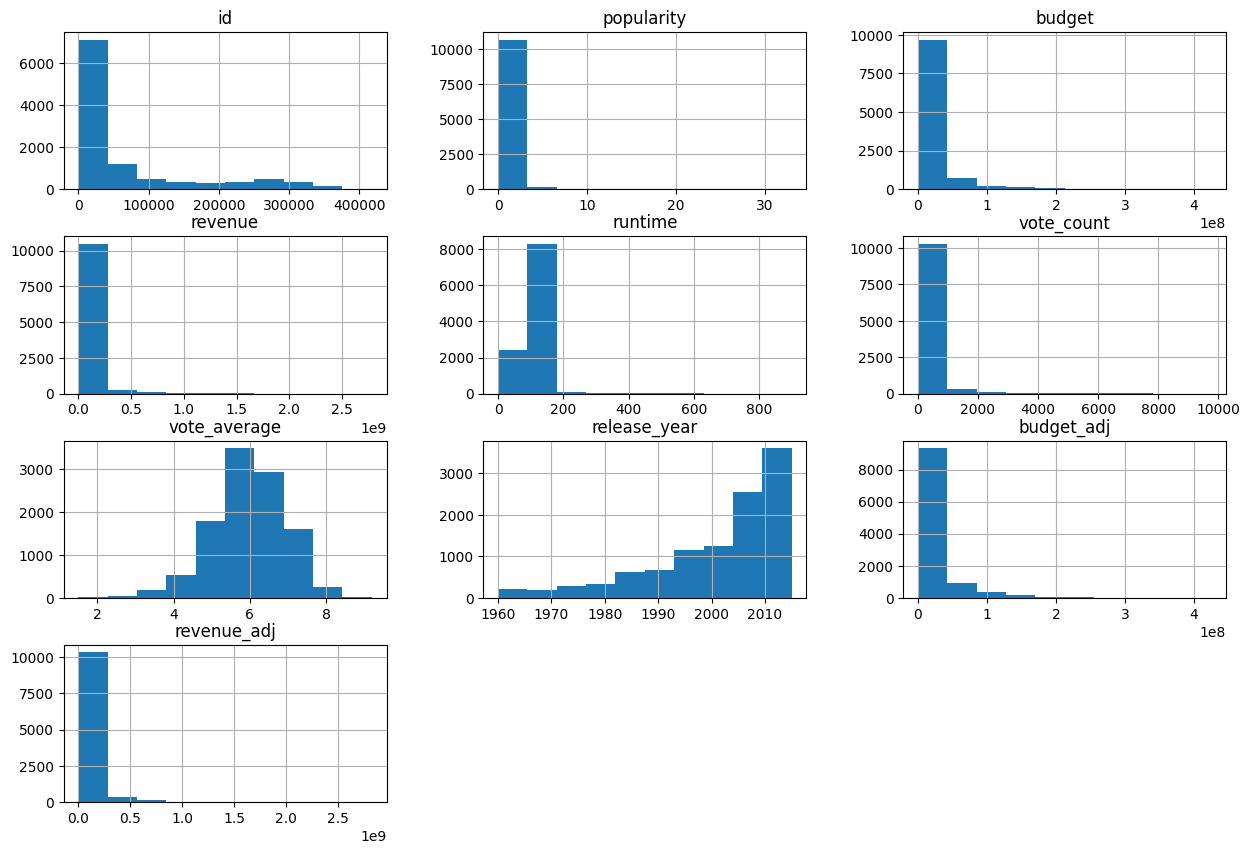

In [8]:
# Plot Histograms for Inspection
tmdb_df.hist(figsize=(15,10));

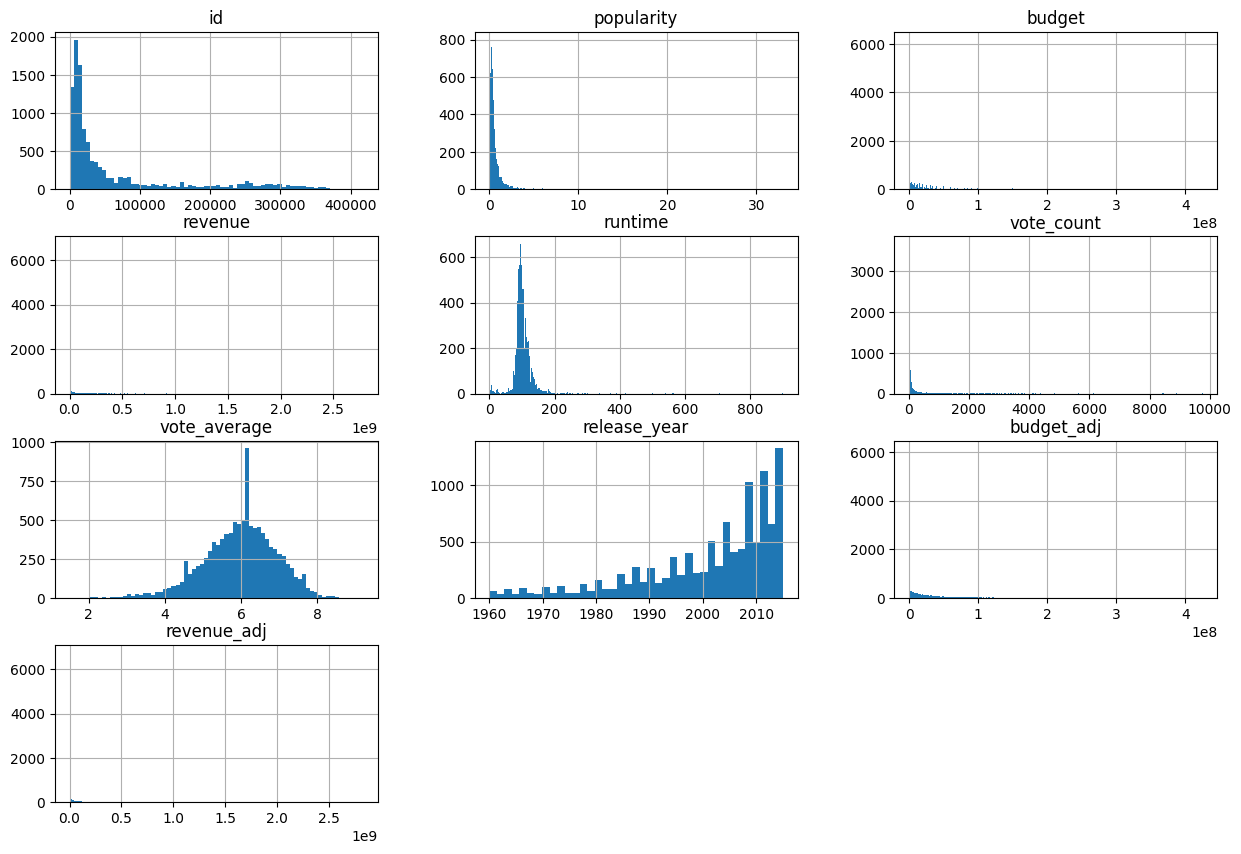

In [9]:
# Plot Histograms for Inspection with a detailed view
tmdb_df.hist(figsize=(15,10), bins='auto');

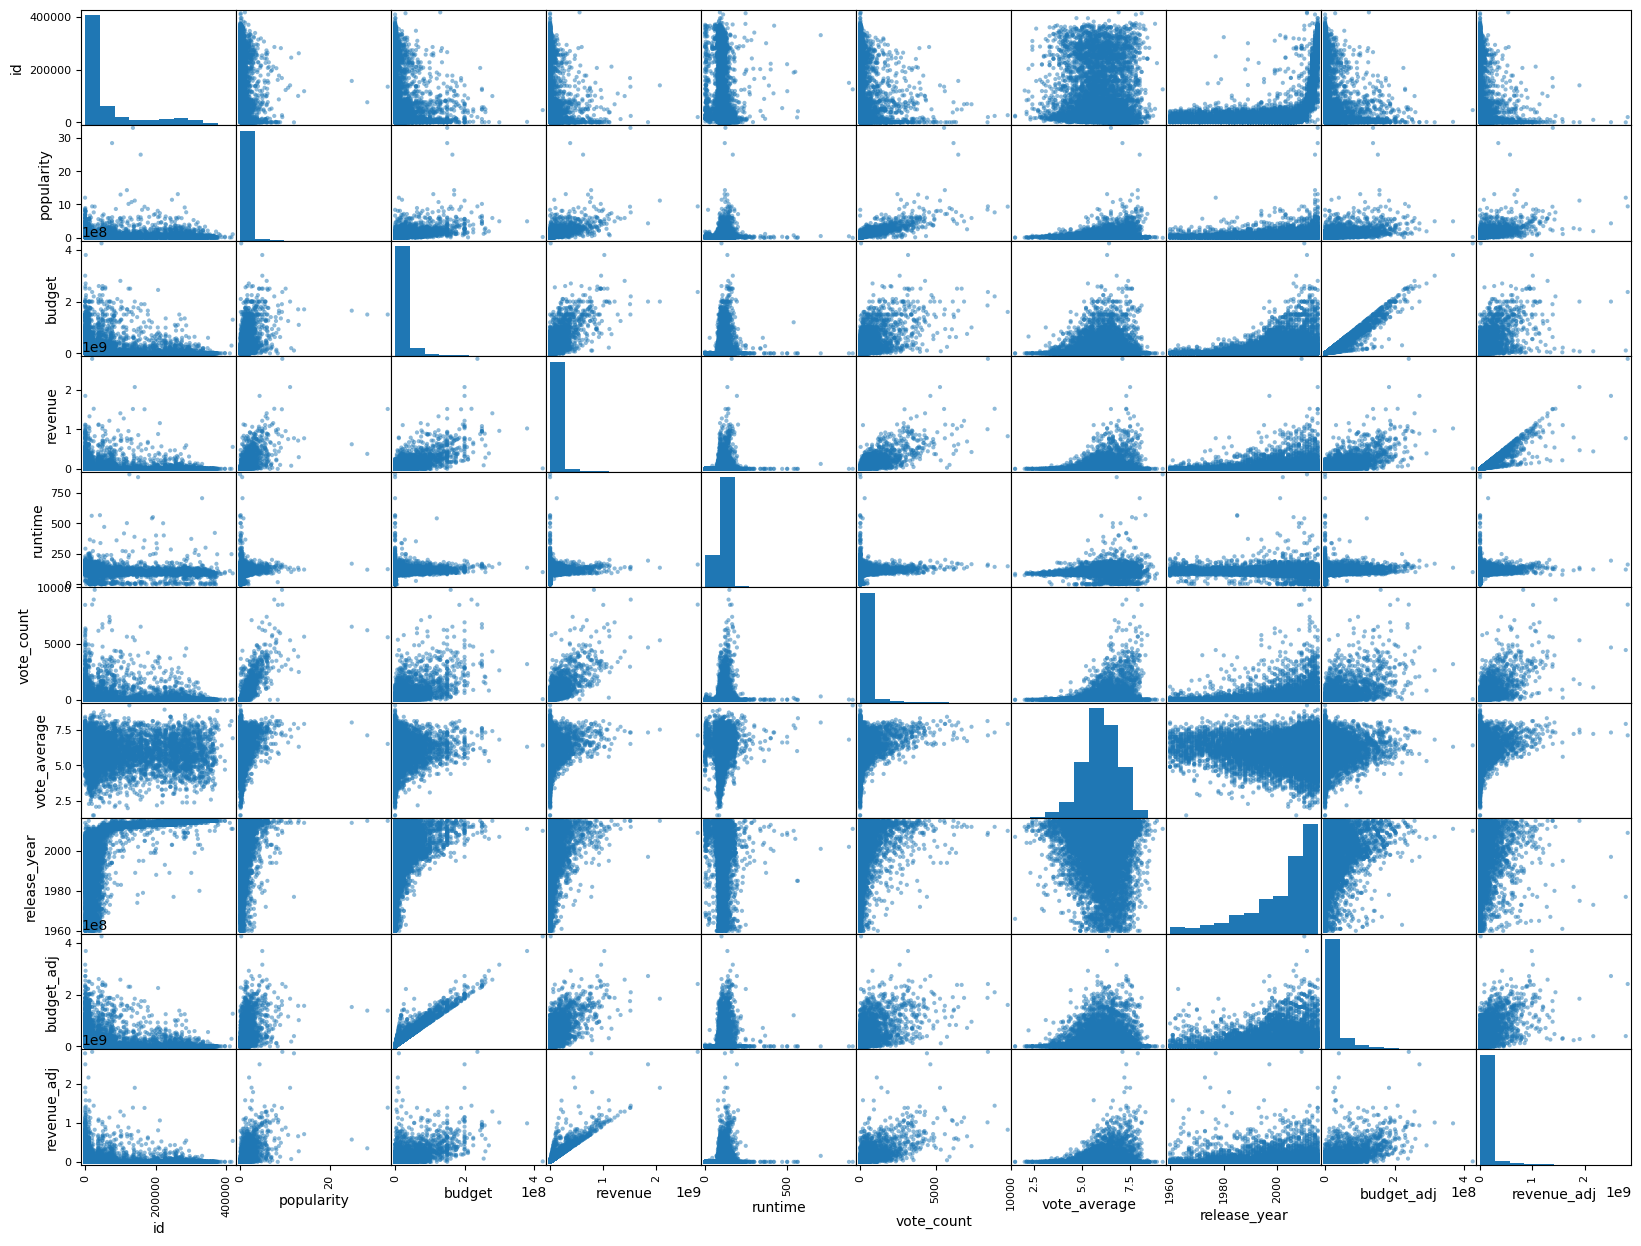

In [10]:
# Plot Scatter for all variables
pd.plotting.scatter_matrix(tmdb_df, figsize=(20,15));

#### Preliminary Insights

This dataset contains 10866 rows (items i.e. movies) with 21 columns (features). 

There are missing values for some of the features: `cast, homepage, director, tagline, keywords, overview, genres` and `production_companies`. 

There is also only one duplicated row which will need to be investigated and handled.

##### Histograms

Based on the inital histograms, we can see almost all movies budgets were under 100 million USD and most movies generated a revenue under 500 million USD. I suspect most movies have a budget under 1 million USD based on the second histogram plots. The average runtime seems to be between 90-110 minutes and the average vote rating is centered around 6/10. It is interesting to note that the number of movies being released is growing rapidly (an exponential distribution might fit this trend). 

##### Scatter Plots

The scatter plots are quite messy and hard to read with so much information. I will revisit this later after cleaning the data.

##### Unnecessary Columns

For the purposes of this investigation, we will drop the unneceesary columns which add no value for this analysis. These include: `id, imdb_id, homepage, tagline, overview, vote_count` and `release_date`.

Although it would be interesting to see the relationship between `cast, directors, keywords, productions companies, genres` and success in `popularity, revenue` and `vote_average`. I think it is unnecessary given the specifications of the questions poised. So these columns will be removed as well.

I will also remove the budget and revenue columns as we were given them adjusted for inflation (`budget_adj` and `revenue_adj` respectively). These adjusted amounts allows us to compare movies from different years i.e. the values are scaled appropiately so we are comparing like-for-like.

I am choosing to keep the original title for reference when plotting and other tasks etc.

##### Data types
The quantitative columns appear to be adequate. So it will not be required to convert them to different types. However, for example, each movie can have multiple genres - the genre column contains strings with a pipe (`|`) dividing the different genres. This will not affect this investigation since we are dropping this feature.


### Data Cleaning

#### Remove unnecessary features

In [11]:
# Get a list of column names
print(list(tmdb_df.columns))

['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title', 'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview', 'runtime', 'genres', 'production_companies', 'release_date', 'vote_count', 'vote_average', 'release_year', 'budget_adj', 'revenue_adj']


In [12]:
# Drop columns
tmdb_df.drop(['id', 'imdb_id', 'budget', 'revenue', 'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview', 'production_companies', 'release_date', 'vote_count'], axis=1, inplace=True)

In [13]:
# Check the dataframe
tmdb_df.head(1)

,popularity,original_title,runtime,genres,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6.5,2015,1.379999e+08,1.392446e+09


#### Investigate and handle duplicated rows

In [14]:
# Check for duplicates
print('Number of duplicates:', tmdb_df.duplicated().sum())

Number of duplicates: 1


In [15]:
# Investigate the rows of interest
tmdb_df[tmdb_df.duplicated(keep=False)]

,popularity,original_title,runtime,genres,vote_average,release_year,budget_adj,revenue_adj
2089,0.59643,TEKKEN,92,Crime|Drama|Action|Thriller|Science Fiction,5.0,2010,30000000.0,967000.0
2090,0.59643,TEKKEN,92,Crime|Drama|Action|Thriller|Science Fiction,5.0,2010,30000000.0,967000.0


In [16]:
# Drop duplicated row
tmdb_df.drop_duplicates(inplace=True)

In [17]:
# Check it worked
print('Number of duplicates:', tmdb_df.duplicated().sum())

Number of duplicates: 0


#### Investigate and handle missing values

Although I won't be using the genre column, I wanted to show the what I might do if I have to check and handle missing values. I will make a copy of the dataframe for this demonstration.

In [18]:
# Make copy, ensure its clean using the deep command.
tmdb_df_copy = tmdb_df.copy(deep=True)

In [19]:
# Investigate missing values after columns drop
tmdb_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   popularity      10865 non-null  float64
 1   original_title  10865 non-null  object 
 2   runtime         10865 non-null  int64  
 3   genres          10842 non-null  object 
 4   vote_average    10865 non-null  float64
 5   release_year    10865 non-null  int64  
 6   budget_adj      10865 non-null  float64
 7   revenue_adj     10865 non-null  float64
dtypes: float64(4), int64(2), object(2)
memory usage: 763.9+ KB


In [20]:
# Find the count of missing values
tmdb_df_copy.isnull().sum()

popularity         0
original_title     0
runtime            0
genres            23
vote_average       0
release_year       0
budget_adj         0
revenue_adj        0
dtype: int64

The only column containing missing values now is the genre column. Since this is a non-numeric column (i.e. it is qualitative), the simplest and most reasonable solution would be to drop the rows with missing values since we can't using any basic statistics (such as the mean) to fill in the missing values. Before we do so, let's see the rows with the missing values to double check there isn't anything important I might be missing before I drop them.

In [21]:
# Display rows with missing values
tmdb_df_copy[tmdb_df_copy['genres'].isnull()]

,popularity,original_title,runtime,genres,vote_average,release_year,budget_adj,revenue_adj
424,0.244648,Belli di papÃ,100,NaN,6.1,2015,0.00000,0.0
620,0.129696,All Hallows' Eve 2,90,NaN,5.0,2015,0.00000,0.0
997,0.330431,Star Wars Rebels: Spark of Rebellion,44,NaN,6.8,2014,0.00000,0.0
1712,0.302095,Prayers for Bobby,88,NaN,7.4,2009,0.00000,0.0
1897,0.020701,Jonas Brothers: The Concert Experience,76,NaN,7.0,2009,0.00000,0.0
2370,0.081892,Freshman Father,0,NaN,5.8,2010,0.00000,0.0
2376,0.068411,Doctor Who: A Christmas Carol,62,NaN,7.7,2010,0.00000,0.0
2853,0.130018,Vizontele,110,NaN,7.2,2001,0.00000,0.0
3279,0.145331,ì•„ê¸°ì™€ ë‚˜,96,NaN,6.1,2008,0.00000,0.0
4547,0.520520,London 2012 Olympic Opening Ceremony: Isles of...,220,NaN,8.3,2012,0.00000,0.0


There isn't any obvious reason why these rows are missing values so let's drop them.

In [22]:
# checks if any of columns in tmdb_df_copy have null values - should print True
tmdb_df_copy.isnull().sum().any()

True

In [23]:
# Drop rows with missing values
tmdb_df_copy.dropna(inplace=True)

In [24]:
# checks if any of columns in tmdb_df_copy have null values - should print False
tmdb_df_copy.isnull().sum().any()

False

#### Re-order columns for viewing

In [25]:
# Drop genre column
tmdb_df.drop(['genres'], axis=1, inplace=True)

In [26]:
# Column order before
tmdb_df.head(1)

,popularity,original_title,runtime,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,Jurassic World,124,6.5,2015,1.379999e+08,1.392446e+09


In [27]:
column_to_move = tmdb_df.pop("original_title")

# insert column with insert(location, column_name, column_value)
tmdb_df.insert(0, "original_title", column_to_move)

In [28]:
column_to_move = tmdb_df.pop("release_year")

# insert column with insert(location, column_name, column_value)
tmdb_df.insert(1, "release_year", column_to_move)

In [29]:
# Column order after
tmdb_df.head(1)

,original_title,release_year,popularity,runtime,vote_average,budget_adj,revenue_adj
0,Jurassic World,2015,32.985763,124,6.5,1.379999e+08,1.392446e+09


In [30]:
tmdb_df_clean = tmdb_df.copy(True)

### Final Notes after Data Wrangling 

Before we move on let's re-plot the historgrams from earlier and studied the cleaned dataset to ensure it has the features and information we desire.

In [31]:
tmdb_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   original_title  10865 non-null  object 
 1   release_year    10865 non-null  int64  
 2   popularity      10865 non-null  float64
 3   runtime         10865 non-null  int64  
 4   vote_average    10865 non-null  float64
 5   budget_adj      10865 non-null  float64
 6   revenue_adj     10865 non-null  float64
dtypes: float64(4), int64(2), object(1)
memory usage: 679.1+ KB


In [32]:
print('Number of duplicates:', tmdb_df_clean.duplicated().sum())

Number of duplicates: 0


In [33]:
tmdb_df_clean.describe()

,release_year,popularity,runtime,vote_average,budget_adj,revenue_adj
count,10865.000000,10865.000000,10865.000000,10865.000000,1.086500e+04,1.086500e+04
mean,2001.321859,0.646446,102.071790,5.975012,1.754989e+07,5.136900e+07
std,12.813260,1.000231,31.382701,0.935138,3.430753e+07,1.446383e+08
min,1960.000000,0.000065,0.000000,1.500000,0.000000e+00,0.000000e+00
25%,1995.000000,0.207575,90.000000,5.400000,0.000000e+00,0.000000e+00
50%,2006.000000,0.383831,99.000000,6.000000,0.000000e+00,0.000000e+00
75%,2011.000000,0.713857,111.000000,6.600000,2.085325e+07,3.370173e+07
max,2015.000000,32.985763,900.000000,9.200000,4.250000e+08,2.827124e+09


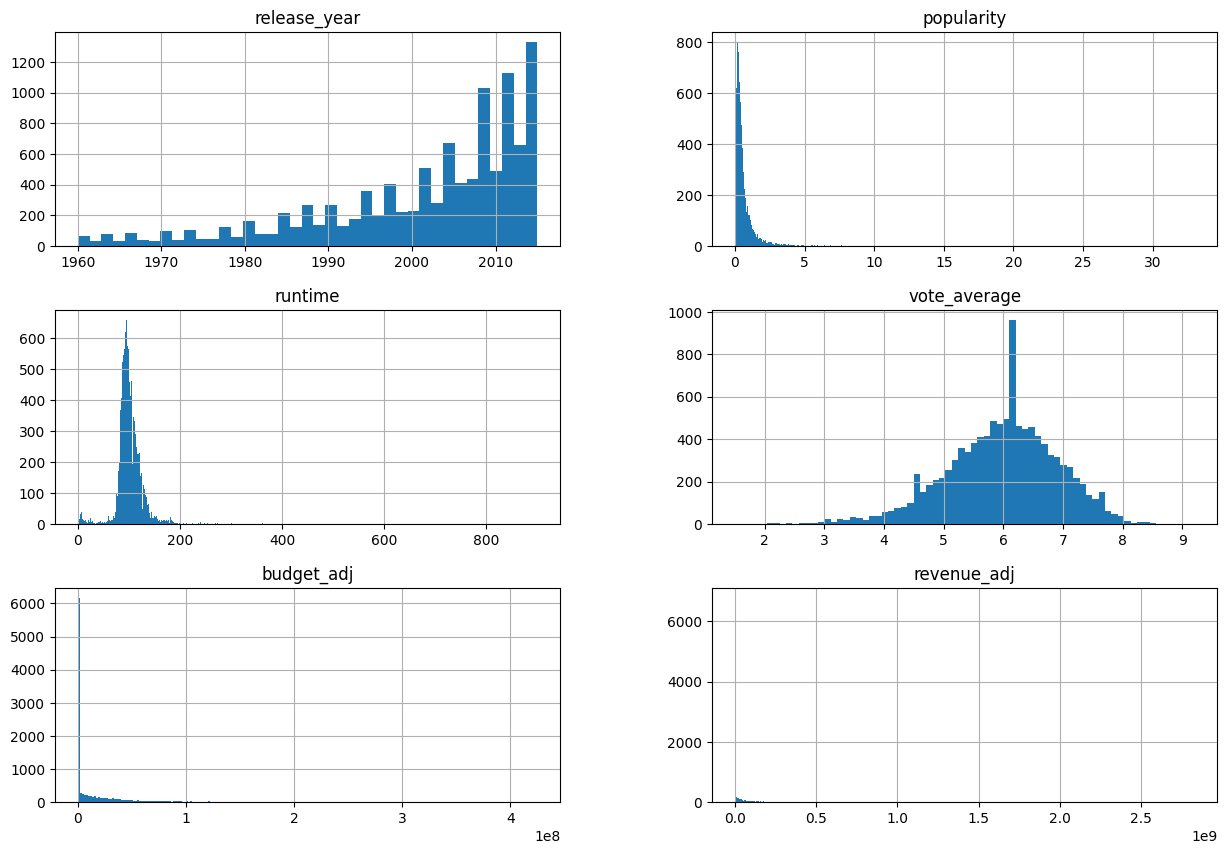

In [34]:
tmdb_df_clean.hist(figsize=(15,10), bins='auto');

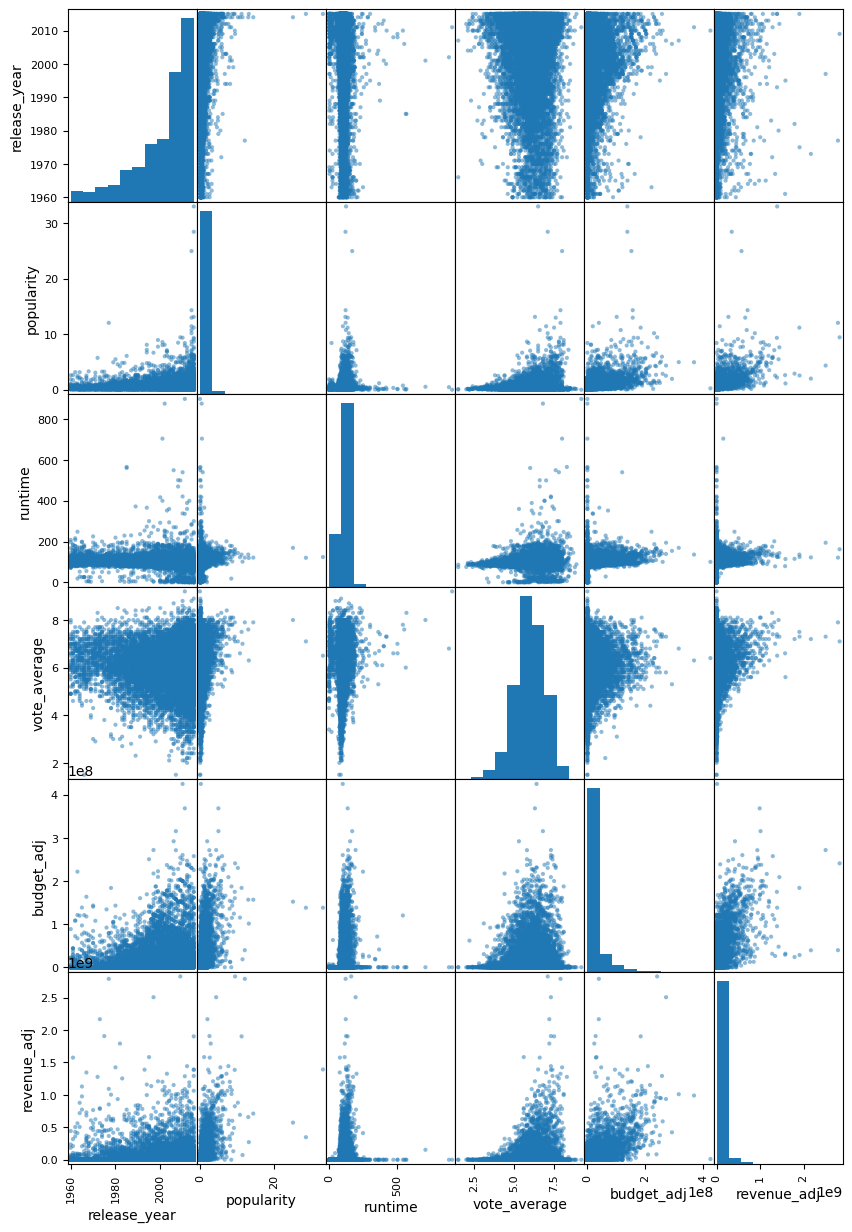

In [35]:
# Plot Scatter for all variables
pd.plotting.scatter_matrix(tmdb_df_clean, figsize=(10,15));

Great. We have a cleaned TMDb dataset with 10865 rows and 6 columns. There are no missing values or duplicated rows. It has all the features necessary to answet the research questions poised in the introduction.

##### Revisiting the scatter plots and histograms
There doesn't seem to be much correlations within between these features. Perhaps more will come to light upon further investigation. We can see that popularity is skewed to the right. The voting average appears to be normally distributed. The runtime also appears to be normally distributed but I am curious as to the movies with runtimes of 800minutes or more. These may be outliers or incorrect information. The quantity of movies being released very year are increasing - this could be an exponential distribution. Does more movies mean that it is a more proftiable and successful industry?

We are now ready to begin the EDA portion of this project.

##### Normalization

To aid with the plottitng of the scatter diagrams and ensure we draw better conclusions I will create a new dataframe with all the same features but normalized between a range of [0,1] using the min-max scaling approach.

In [36]:
tmdb_df_normalized = tmdb_df_clean.copy(deep=True)

# Code taken from https://www.geeksforgeeks.org/data-normalization-with-pandas/

# apply normalization techniques
for column in tmdb_df_normalized.columns[2:]:
    tmdb_df_normalized[column] = (tmdb_df_normalized[column] - tmdb_df_normalized[column].min()) / (tmdb_df_normalized[column].max() - tmdb_df_normalized[column].min()) 

tmdb_df_normalized.head()

,original_title,release_year,popularity,runtime,vote_average,budget_adj,revenue_adj
0,Jurassic World,2015,1.000000,0.137778,0.649351,0.324706,0.492531
1,Mad Max: Fury Road,2015,0.861582,0.133333,0.727273,0.324706,0.123150
2,Insurgent,2015,0.397519,0.132222,0.623377,0.238118,0.096076
3,Star Wars: The Force Awakens,2015,0.338724,0.151111,0.779221,0.432941,0.673024
4,Furious 7,2015,0.283000,0.152222,0.753247,0.411294,0.490162


<a id='eda'></a>
## Exploratory Data Analysis

> NB: Remember that success, as I have defined for this context, it is either a higher popularity score, greater revenue generated or a higher vote average.

### Are movies with greater budgets associated with more successful?

First, I will plot the histogram of the budget to see general range of values and a boxplot to see possible outliers.

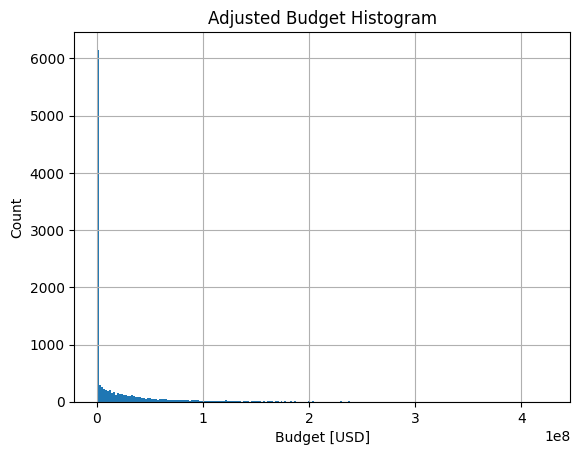

In [37]:
tmdb_df_clean.budget_adj.hist(bins='auto');
plt.title('Adjusted Budget Histogram');
plt.ylabel('Count');
plt.xlabel('Budget [USD]');

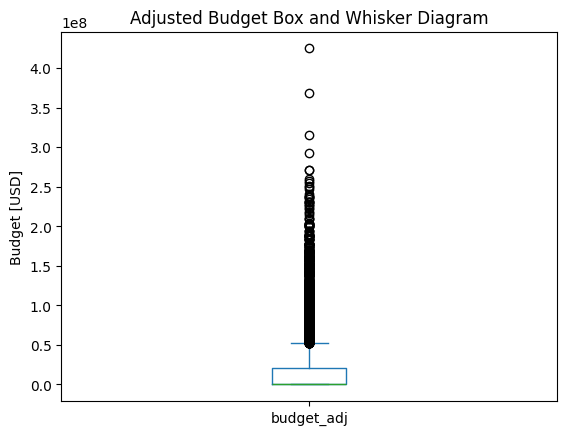

In [38]:
tmdb_df_clean.budget_adj.plot(kind = 'box');
plt.title('Adjusted Budget Box and Whisker Diagram');
plt.ylabel('Budget [USD]');
plt.yticks(np.arange(0.e+00, 4.5e+08, 0.5e+08));

In [39]:
# Summary Statistics
tmdb_df_clean.budget_adj.describe()

count    1.086500e+04
mean     1.754989e+07
std      3.430753e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      2.085325e+07
max      4.250000e+08
Name: budget_adj, dtype: float64

It seems the majority of movies have budgets under 100 million USD with the average only being 17.5 million USD. Let's plot the budget agaunst revenue, popularity and average vote to identify any correlations or trends.

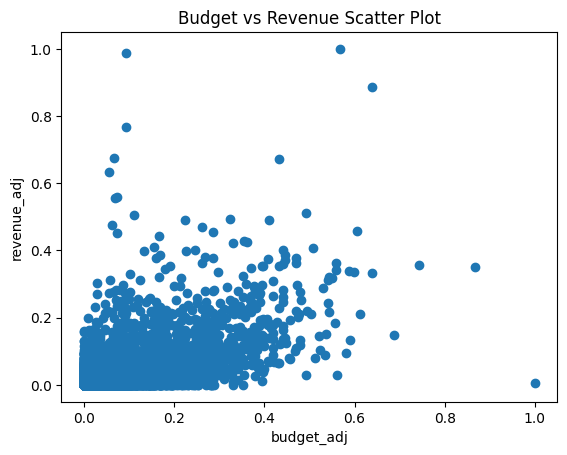

In [40]:
make_plot(x_data=tmdb_df_normalized.budget_adj, y_data=tmdb_df_normalized.revenue_adj, title='Budget vs Revenue Scatter Plot', xlabel='budget_adj', ylabel='revenue_adj')

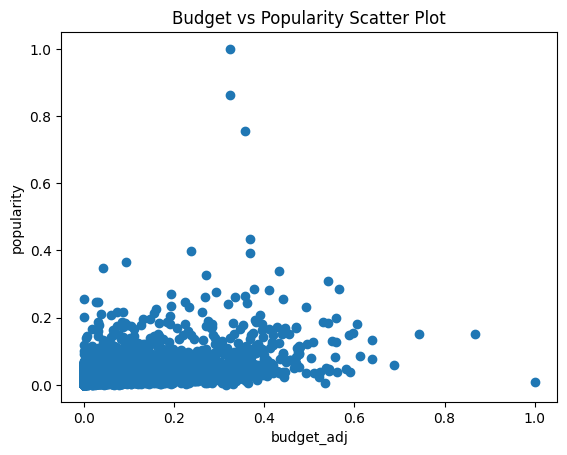

In [41]:
make_plot(x_data=tmdb_df_normalized.budget_adj, y_data=tmdb_df_normalized.popularity, title='Budget vs Popularity Scatter Plot', xlabel='budget_adj', ylabel='popularity')

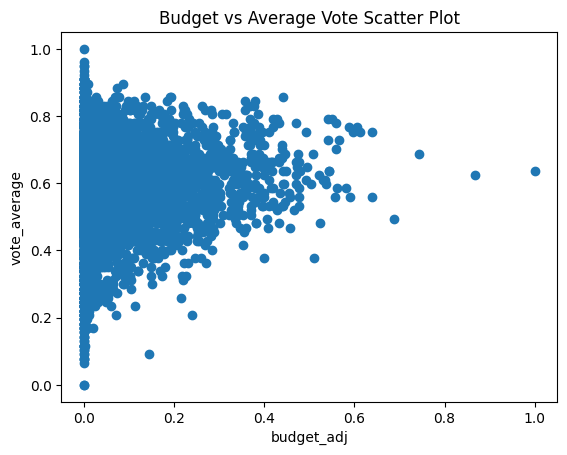

In [42]:
make_plot(x_data=tmdb_df_normalized.budget_adj, y_data=tmdb_df_normalized.vote_average, title='Budget vs Average Vote Scatter Plot', xlabel='budget_adj', ylabel='vote_average')

There doesn't seem to be any correlations between budget and revenue, perhaps a weak positive one at best. However, there does seem to be a positive correlation between budget and popularity  / average vote. Since there seems to be a large amount of outliers, let me filter the movies and see if a clearer pattern emerges. I decided to filter all movies using a budget of 75 million USD or more out. There is no particular reason for this other than the inspecting the boxplot and deciding on a reasonable value.

In [43]:
# Filter movies to under 75 million budget
tmdb_df_budget_less_than_75_mil = tmdb_df_clean.query('budget_adj <= 75e+06')
tmdb_df_budget_less_than_75_mil

,original_title,release_year,popularity,runtime,vote_average,budget_adj,revenue_adj
8,Minions,2015,7.404165,91,6.5,6.807997e+07,1.064192e+09
12,Ex Machina,2015,6.118847,108,7.6,1.379999e+07,3.391985e+07
15,The Hateful Eight,2015,5.898400,167,7.4,4.047998e+07,1.432992e+08
16,Taken 3,2015,5.749758,109,6.1,4.415998e+07,2.997096e+08
21,Southpaw,2015,5.337064,123,7.3,2.759999e+07,8.437300e+07
...,...,...,...,...,...,...,...
10861,The Endless Summer,1966,0.080598,95,7.4,0.000000e+00,0.000000e+00
10862,Grand Prix,1966,0.065543,176,5.7,0.000000e+00,0.000000e+00
10863,Beregis Avtomobilya,1966,0.065141,94,6.5,0.000000e+00,0.000000e+00
10864,"What's Up, Tiger Lily?",1966,0.064317,80,5.4,0.000000e+00,0.000000e+00


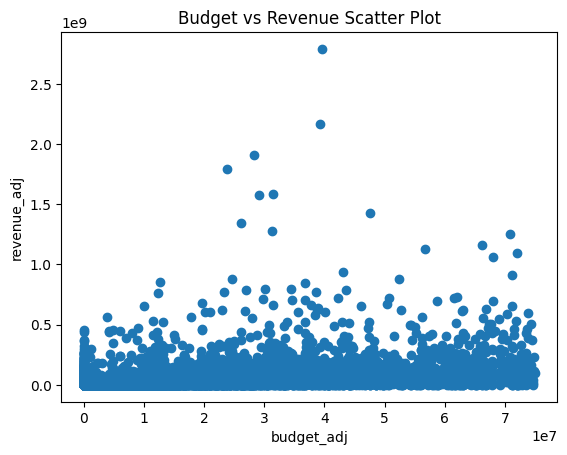

In [44]:
# Replot
make_plot(x_data=tmdb_df_budget_less_than_75_mil.budget_adj, y_data=tmdb_df_budget_less_than_75_mil.revenue_adj, title='Budget vs Revenue Scatter Plot', xlabel='budget_adj', ylabel='revenue_adj')


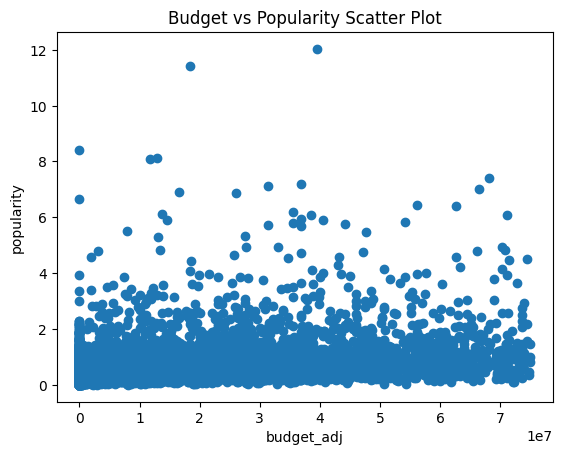

In [45]:
make_plot(x_data=tmdb_df_budget_less_than_75_mil.budget_adj, y_data=tmdb_df_budget_less_than_75_mil.popularity, title='Budget vs Popularity Scatter Plot', xlabel='budget_adj', ylabel='popularity')

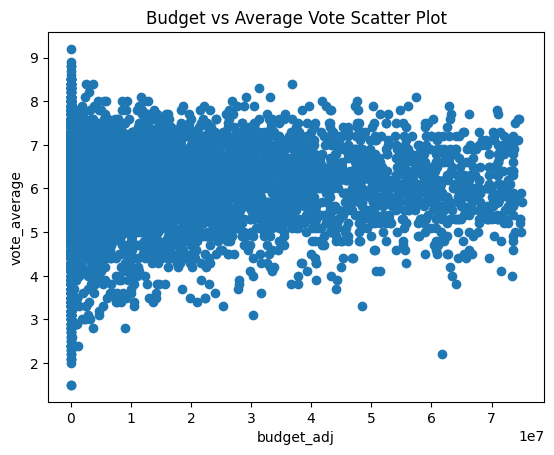

In [46]:
make_plot(x_data=tmdb_df_budget_less_than_75_mil.budget_adj, y_data=tmdb_df_budget_less_than_75_mil.vote_average, title='Budget vs Average Vote Scatter Plot', xlabel='budget_adj', ylabel='vote_average')

Unfortunately there doesn't seem to be a strong correlation between budget and success. Just becuase the movie has a bigger budget doesn't indicate it might be more successful. There are more variables to investigate to help determine this. In fact, it seem the movies with the largest budget seem to be failures, which begs the question if they are worth it? Or if maybe the hype was too great.

### How does runtime (the length of a movie) affect its success?

Similar to the budget above, I will produce the same plots and see if there any associations.

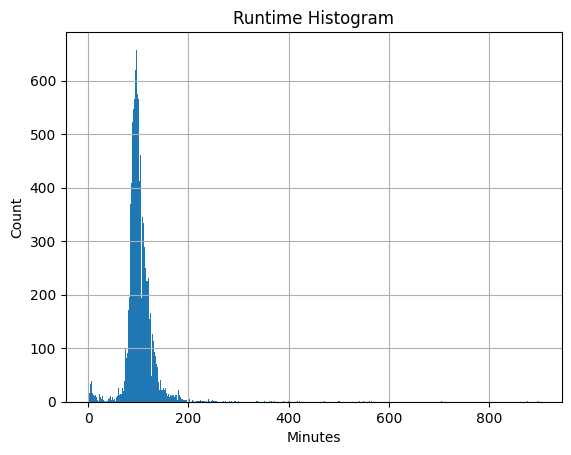

In [47]:
tmdb_df_clean.runtime.hist(bins='auto');
plt.title('Runtime Histogram');
plt.ylabel('Count');
plt.xlabel('Minutes');

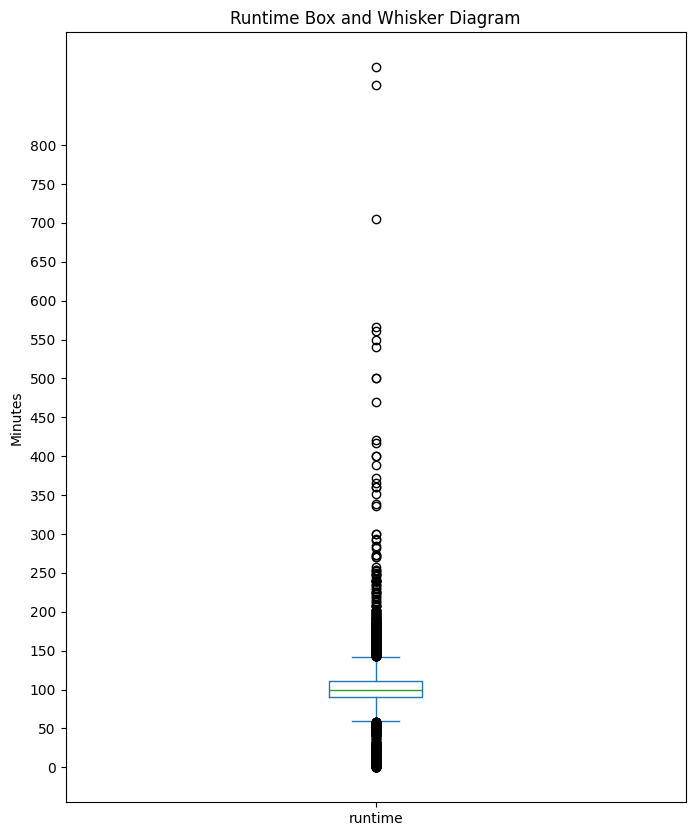

In [48]:
tmdb_df_clean.runtime.plot(kind = 'box', figsize=(8,10));
plt.title('Runtime Box and Whisker Diagram');
plt.yticks(np.arange(0,850,50))
plt.ylabel('Minutes');

In [49]:
# Summary Statistics
tmdb_df_clean.runtime.describe()

count    10865.000000
mean       102.071790
std         31.382701
min          0.000000
25%         90.000000
50%         99.000000
75%        111.000000
max        900.000000
Name: runtime, dtype: float64

The average runtime is 102 minutes with 50% of the movies being between 90 to 111 minutes. This confirms my intuition at the start.

/Users/jameshansen/opt/anaconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


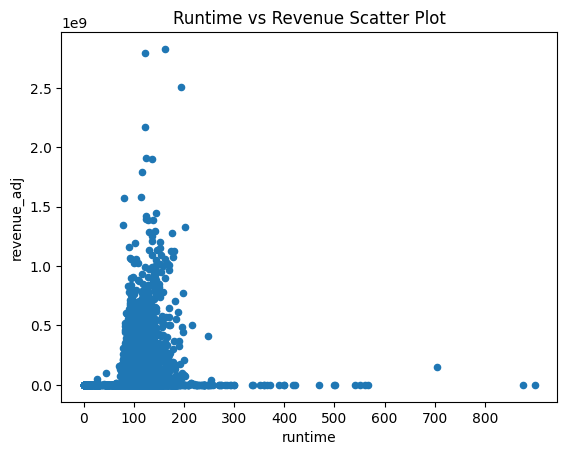

In [50]:
tmdb_df_clean.plot.scatter(x='runtime', y='revenue_adj');
plt.xticks(np.arange(0,850,100))
plt.title('Runtime vs Revenue Scatter Plot');

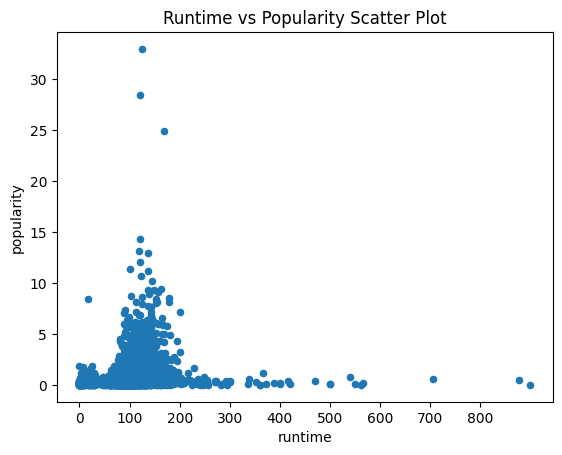

In [51]:
tmdb_df_clean.plot.scatter(x='runtime', y='popularity');
plt.xticks(np.arange(0,850,100))
plt.title('Runtime vs Popularity Scatter Plot');

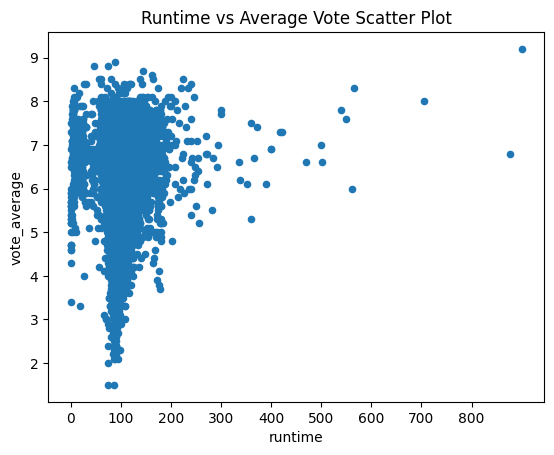

In [52]:
tmdb_df_clean.plot.scatter(x='runtime', y='vote_average');
plt.xticks(np.arange(0,850,100))
plt.title('Runtime vs Average Vote Scatter Plot');

Once again, there aren't any obvious correlations here.  Although, it seems that runtime does have a psotive correlation with revenue. We can also deduce that there is a sweet spot just after 100 minutes and below 200 minutes where the movie can be very successful given the other factors are correct.

Similar to before, I will filter the movies to remove outliers by inspecting the boxplot. I have chosen movies between 50 to 200 minutes to coinside with my suspicions previously stated.

In [53]:
# Filter movies to runtime between 50 - 200 minutes
tmdb_df_minutes = tmdb_df_clean[(tmdb_df_clean.runtime >= 50) & (tmdb_df_clean.runtime <= 200)]

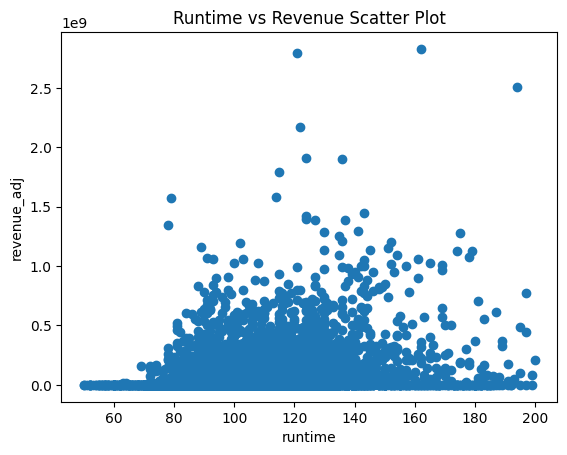

In [54]:
make_plot(x_data=tmdb_df_minutes.runtime, y_data=tmdb_df_minutes.revenue_adj, title='Runtime vs Revenue Scatter Plot', xlabel='runtime', ylabel='revenue_adj')

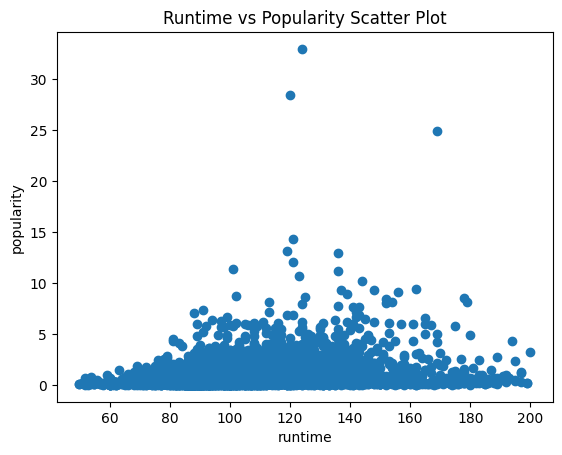

In [55]:
make_plot(x_data=tmdb_df_minutes.runtime, y_data=tmdb_df_minutes.popularity, title='Runtime vs Popularity Scatter Plot', xlabel='runtime', ylabel='popularity')

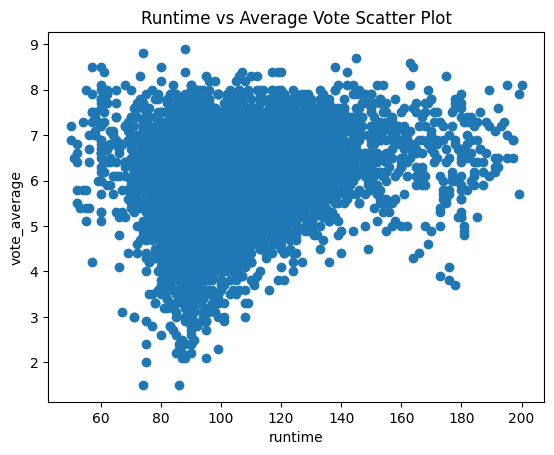

In [56]:
make_plot(x_data=tmdb_df_minutes.runtime, y_data=tmdb_df_minutes.vote_average, title='Runtime vs Average Vote Scatter Plot', xlabel='runtime', ylabel='vote_average')

There is no correlations between any of the variables. Once again, it seems that a movies succes depends on more than just one factor.

### Do recent movies have greater success than older movies?

Following a similar apporach as above.

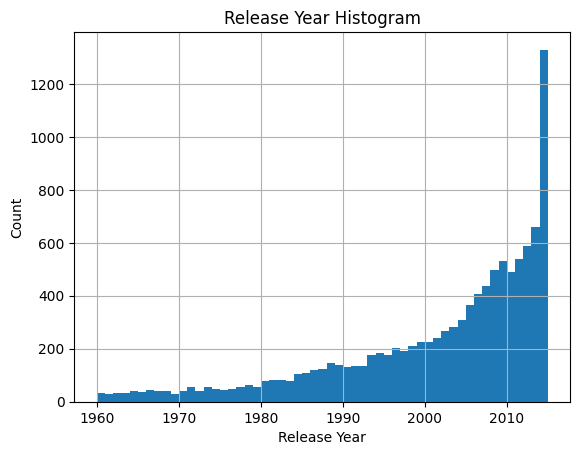

In [57]:
tmdb_df_clean.release_year.hist(bins=55);
plt.title('Release Year Histogram');
plt.ylabel('Count');
plt.xlabel('Release Year');

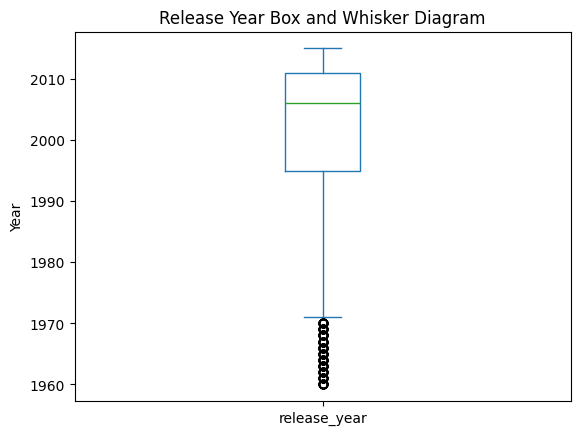

In [58]:
tmdb_df_clean.release_year.plot(kind = 'box');
plt.title('Release Year Box and Whisker Diagram');
plt.ylabel('Year');

In [59]:
# Summary Statistics
tmdb_df_clean.release_year.describe()

count    10865.000000
mean      2001.321859
std         12.813260
min       1960.000000
25%       1995.000000
50%       2006.000000
75%       2011.000000
max       2015.000000
Name: release_year, dtype: float64

The summary statistics and box-and-whisker diagram do not help too much here as it is clear from the histogram that more movies are being release year upon year. 

Let's compare the release year to the variables of success as I have defined it.

/Users/jameshansen/opt/anaconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


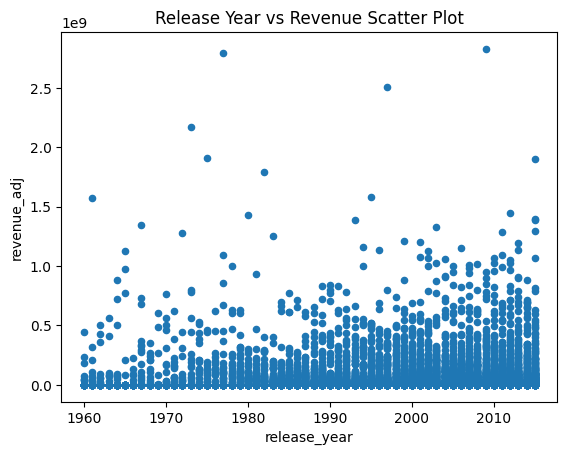

In [60]:
tmdb_df_clean.plot.scatter(x='release_year', y='revenue_adj');
plt.title('Release Year vs Revenue Scatter Plot');

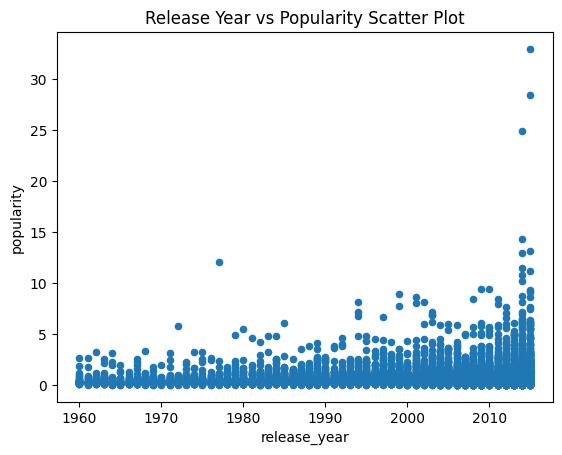

In [61]:
tmdb_df_clean.plot.scatter(x='release_year', y='popularity');
plt.title('Release Year vs Popularity Scatter Plot');

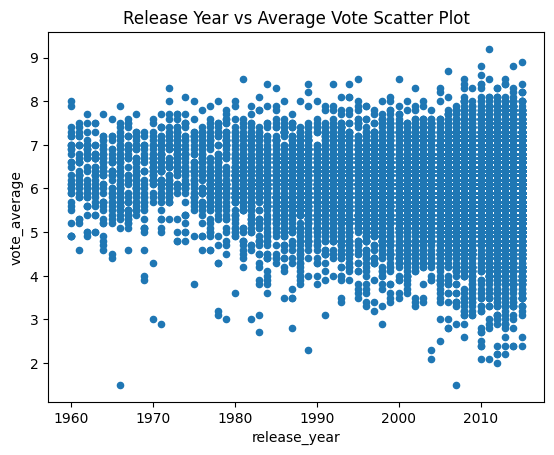

In [62]:
tmdb_df_clean.plot.scatter(x='release_year', y='vote_average');
plt.title('Release Year vs Average Vote Scatter Plot');

These plots aren't too helpful. I will group by release year and find the mean values for each feature to see if it provides more insight. I am using the normalized dataet for some of the plots so we can compare multiple dependent variables.

In [63]:
# Group by release year
tmdb_df_by_year_normalized = tmdb_df_normalized.groupby('release_year')
tmdb_df_by_year = tmdb_df_clean.groupby('release_year')


In [64]:
tmdb_df_by_year_normalized.mean().head()

,popularity,runtime,vote_average,budget_adj,revenue_adj
release_year,,,,,
1960,0.013911,0.122951,0.626623,0.011958,0.011818
1961,0.012817,0.132688,0.633012,0.025546,0.028110
1962,0.013785,0.138160,0.629058,0.029005,0.017177
1963,0.015238,0.123693,0.627196,0.036134,0.013882
1964,0.012501,0.121349,0.611936,0.015551,0.020189


In [65]:
# Inspect
tmdb_df_by_year.mean().head()

,popularity,runtime,vote_average,budget_adj,revenue_adj
release_year,,,,,
1960,0.458932,110.656250,6.325000,5.082036e+06,3.340991e+07
1961,0.422827,119.419355,6.374194,1.085687e+07,7.947167e+07
1962,0.454783,124.343750,6.343750,1.232693e+07,4.856238e+07
1963,0.502706,111.323529,6.329412,1.535687e+07,3.924580e+07
1964,0.412428,109.214286,6.211905,6.608980e+06,5.707603e+07


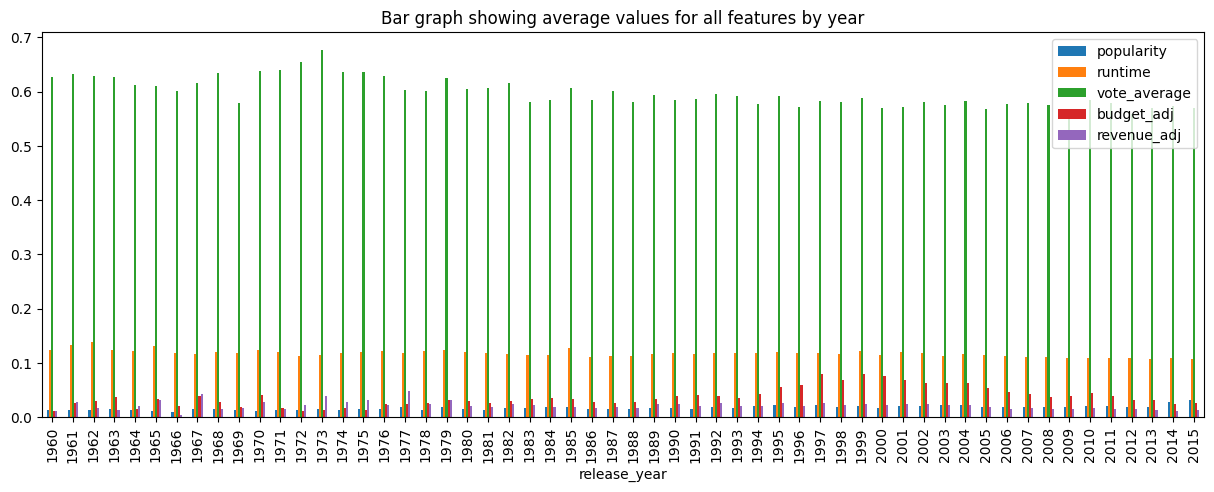

In [66]:
tmdb_df_by_year_normalized.mean().plot(kind= 'bar', figsize=(15,5));
plt.title('Bar graph showing average values for all features by year');

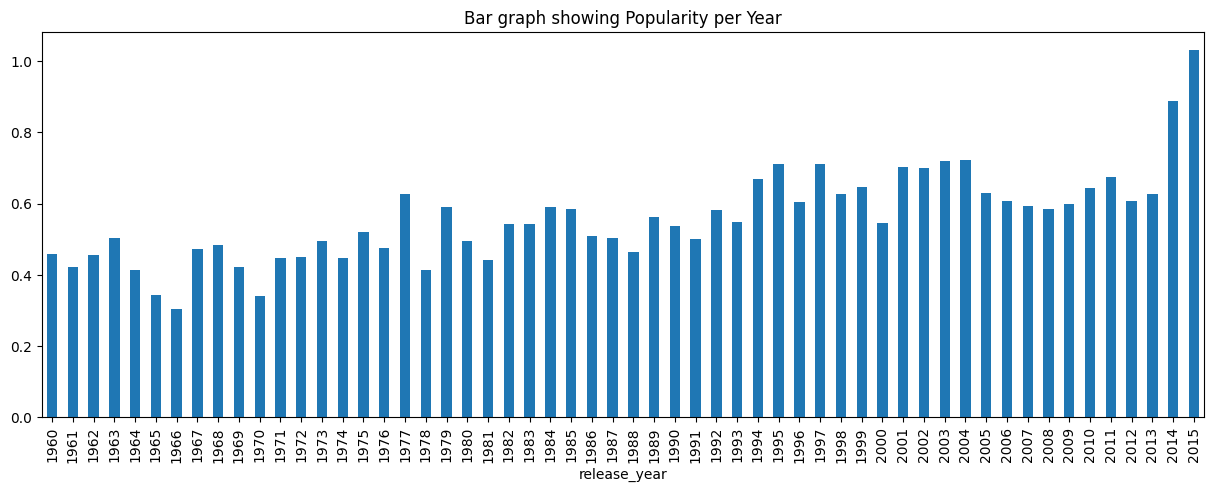

In [67]:
tmdb_df_by_year.popularity.mean().plot(kind= 'bar', figsize=(15,5));
plt.title('Bar graph showing Popularity per Year');

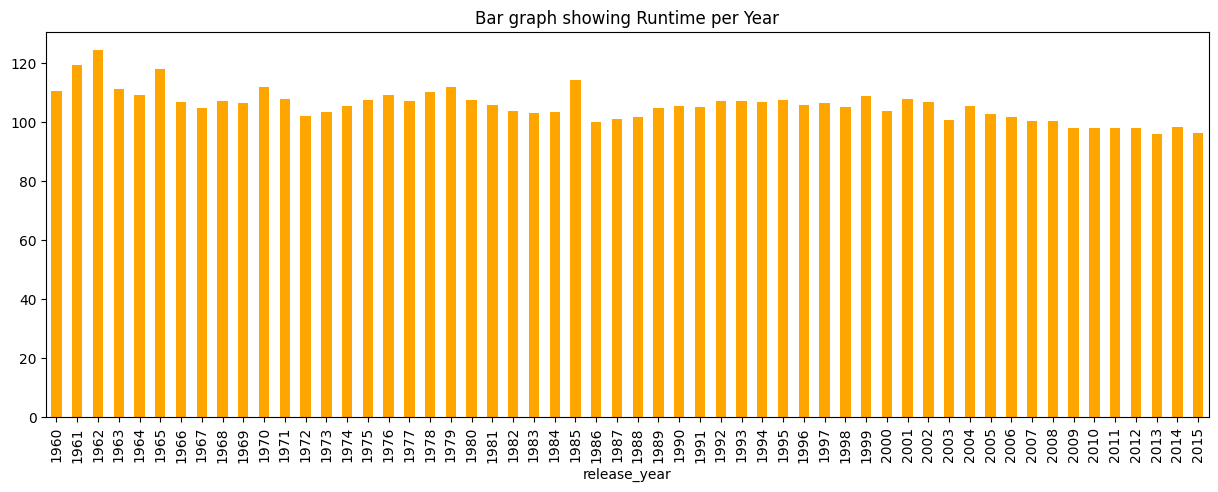

In [68]:
tmdb_df_by_year.runtime.mean().plot(kind= 'bar', figsize=(15,5), color= 'orange');
plt.title('Bar graph showing Runtime per Year');

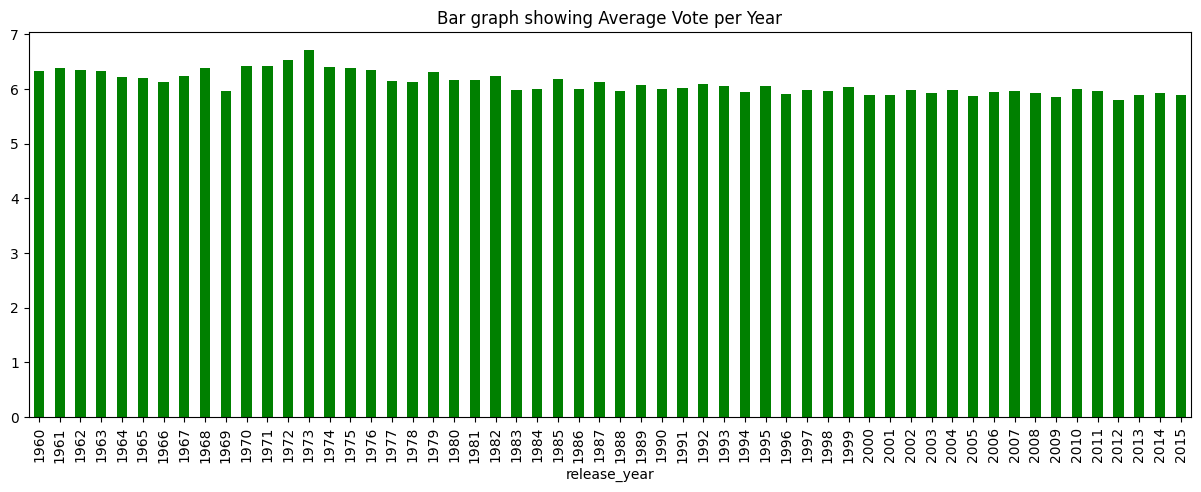

In [69]:
tmdb_df_by_year.vote_average.mean().plot(kind= 'bar', figsize=(15,5), color='green');
plt.title('Bar graph showing Average Vote per Year');

/var/folders/7v/qbbg1srn6y3f734xn62pv9v80000gn/T/ipykernel_93025/1867383330.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  tmdb_df_by_year_normalized['budget_adj', 'revenue_adj'].mean().plot(kind= 'bar', figsize=(15,8), color=['red', 'purple']);


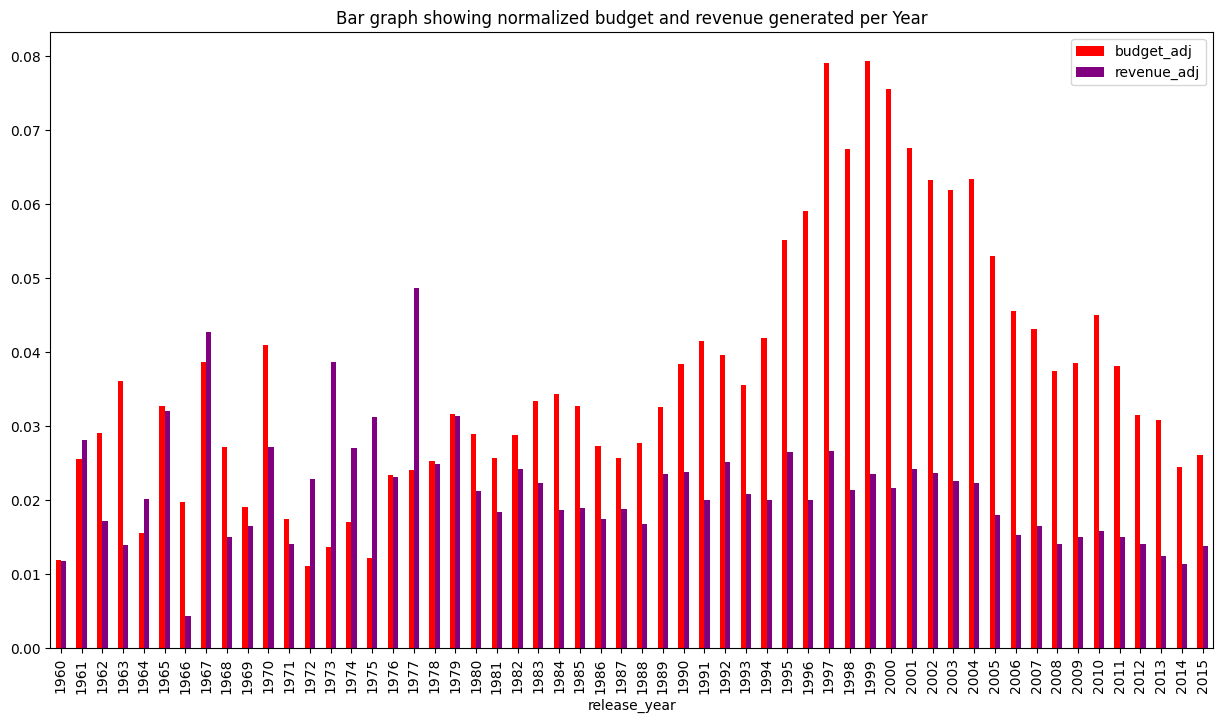

In [70]:
tmdb_df_by_year_normalized['budget_adj', 'revenue_adj'].mean().plot(kind= 'bar', figsize=(15,8), color=['red', 'purple']);
plt.title('Bar graph showing normalized budget and revenue generated per Year');

Based on the bar graphs, we can see that popularity has increeased steadily as the years passed on. However, the mean runtime and average vote has not changed. This could be due to the restrictions of the medium and the attention span of viewers, however this is pure speculation. What is interesting to note is that the budget for movies steadility increased over time but began to decline from the year 2000. This could indicate that the turn of the 21st cebntury brought some advancements in film making which improved efficiency and the the cost-effectiveness. This could also be why the number of movies have increase steadily with an exponential increase from the year 2000 if we observe the histogram.

However, revenue still seems to be uncorrelated to these factors which indicates that movies have many factors that influence its success and it is not simply down to a few isolated variables.

<a id='conclusions'></a>
## Conclusions

In conclusion, there is no obvious correlations between budget, the runtime of a movie and the release date of a movie and its success. This indicates to me that the success of a movie in geenral is due to multiple factors. Deeper investigation with more variables are required to understand what makes a movie successful.

However, further interetsing questions arose during the process of this investigation such as "why are there more movies being produced as the years pass?" and "what occured near the turn of the 21st century that lead to this increase?". This would require greater domain knowledge and more research.

#### Limitations

A major limitation in the data I faced was the sheer complexity of my question. It became obviously evident that the success of a movie depending on not simply one factor but many. It will require better and more complex tools and techniques to determine this answer. The data and analysis was also perhaps insufficient to effectively conclude the success of a movie - I did not take into account the relative success of other movies released in the same period. Another limitation was the the lack of metadata related to popularity, I didn't have enough context to properly draw conclusions so this limits my ability to infer correct conclusions. 

Thank you for your interest and taking the time to read through this data analysis project.